Loading graph...
Loading graph time: 0:00:07.266029


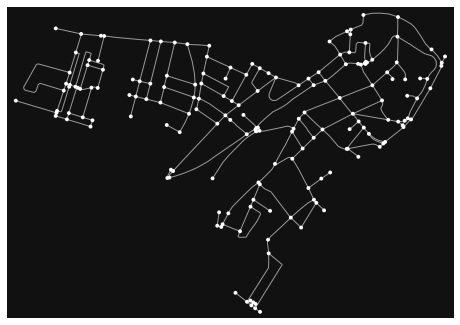

Begining euleriazation...
Eulerize time: 0:00:01.038942
Start the drone
Start by taking the Rue Pierre Marcel
Continue with Avenue Paul Vaillant-Couturier
Continue with Rue Dedouvre
Continue with Avenue Paul Vaillant-Couturier
Continue with Avenue Lénine
Continue with 3e Avenue
Continue with 2e Avenue
Continue with 3e Avenue
Continue with Allée du Colonel Arnaud Beltrame
Continue with 3e Avenue
Continue with Cité du Chaperon Vert
Continue with 2e Avenue
Continue with Rue Danielle Mitterrand
Continue with Avenue du Chaperon Vert
Continue with Avenue Lénine
Continue with Rue Foubert
Continue with Avenue Lénine
Continue with Rue des Carrières
Continue with Rue du Petit Bois
Continue with Rue des Aqueducs
Continue with Mail des Tilleuls
Continue with Avenue Lénine
Continue with Rue des Carrières
Continue with Rue du Petit Bois
Continue with Rue des Aqueducs
Continue with Mail des Tilleuls
Continue with Avenue Lénine
Continue with Avenue Paul Vaillant-Couturier
Continue with Rue Auguste Bla

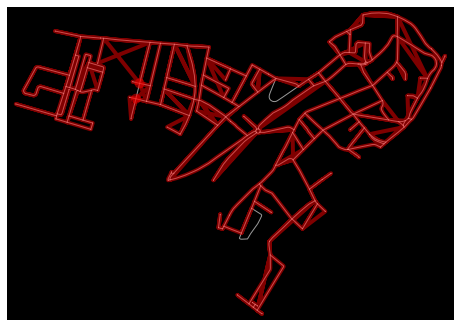

Total time: 0:00:09.172820


In [1]:
import osmnx as ox
import networkx as nx
import datetime
from colorama import Fore
from colorama import Style

def loadingGraph(neighborhood, city, country):
    if (neighborhood):
        G = ox.graph_from_place(neighborhood + ", " + city + ", " + country, network_type='drive', simplify=True).to_undirected()
    else:
        G = ox.graph_from_place(city + ", " + country, network_type='drive', simplify=True).to_undirected()
    G = nx.convert_node_labels_to_integers(G)
    
    return G

def eulerized(G):
    H = nx.eulerize(G)
    return H

def pretty_printGPS(gps):
    print(Fore.RED + Style.BRIGHT + "Start the drone" + Style.RESET_ALL)
    i = 0
    for i in range (0 , len(gps)):
        if i == 0:
            print("Start by taking the " + Fore.GREEN + Style.DIM + gps[i] + Style.RESET_ALL)
        else:
            if gps[i] == gps[i - 1]:
                continue
            else:
                print("Continue with " + Fore.GREEN + Style.DIM + str(gps[i]) + Style.RESET_ALL)
    print(Fore.RED + Style.BRIGHT + "Land the drone")
            

def get_GPS(H):
    tmp = nx.eulerian_circuit(H)
    list_ = []
    GPS = []
    for elem in tmp:
        list_.append(elem[0])
        name = ""
        try:
            name = H.edges[(elem[0], elem[1], 0)]['name']
            if (type(name) == list):
                for road in name:
                    GPS.append(road)
            else:
                GPS.append(name)
        except KeyError:
            continue
    return GPS,list_
    

def main(neighborhood, city, country, print_gps, print_map, print_drone):
    
    #Graph Loading
    begin_load = datetime.datetime.now()
    print(Fore.GREEN + Style.BRIGHT + "Loading graph..." + Style.RESET_ALL)
    G = loadingGraph(neighborhood,city,country)
    print(Fore.BLUE + Style.BRIGHT + "Loading graph time: " + str(datetime.datetime.now() - begin_load))
    if (print_map):
        fig, ax = ox.plot_graph(ox.project_graph(G))


    #Eulerize Graph
    begin_euler = datetime.datetime.now()
    print(Fore.GREEN + Style.BRIGHT + "Begining euleriazation...")
    H = nx.eulerize(G)
    print(Fore.BLUE + Style.BRIGHT + "Eulerize time: " + str(datetime.datetime.now() - begin_euler))
    
    #Option : print the GPS path
    liste = []
    gps,liste = get_GPS(H)
    if (print_gps):
        pretty_printGPS(gps)   
    
    #Print the figures
    if (print_drone):
        fig, ax = ox.plot_graph_route(G, liste, route_linewidth=4, node_size=1, bgcolor='k')

    print(Fore.RED + Style.BRIGHT + "Total time: " + str(datetime.datetime.now() - begin_load))
    
main(None, "Gentilly", "France", True, True, True)